# Hourly historical weather data for all Saudi Arabia (EDA)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [2]:
df=pd.read_csv('weather-sa-2017-2019-clean.csv')
df.head()

,index,region,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1-Jan-17,0:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1-Jan-17,1:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1-Jan-17,3:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1-Jan-17,4:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1-Jan-17,5:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       249023 non-null  int64  
 1   region      249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [4]:
df.describe()

,index,year,month,day,hour,minute,temp,wind,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,248951.000000,249023.000000
mean,121690.686174,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,1015.455355,11.053453
std,71831.546649,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,6.970779,7.053005
min,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,904.000000,-1.000000
25%,59402.500000,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,1011.000000,5.000000
50%,121658.000000,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,1016.000000,16.000000
75%,183913.500000,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,1021.000000,16.000000
max,246169.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1101.000000,161.000000


In [5]:
df['humidity'] = df['humidity'].str.rstrip('%').astype('float') 
df.head()

,index,region,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1-Jan-17,0:00,2017,1,1,24,0,Clear,17,11,64.0,1018.0,16
1,1,Qassim,1-Jan-17,1:00,2017,1,1,1,0,Clear,17,6,64.0,1018.0,16
2,2,Qassim,1-Jan-17,3:00,2017,1,1,3,0,Clear,15,11,72.0,1019.0,16
3,3,Qassim,1-Jan-17,4:00,2017,1,1,4,0,Clear,15,11,72.0,1019.0,16
4,4,Qassim,1-Jan-17,5:00,2017,1,1,5,0,Clear,15,9,72.0,1019.0,16


In [6]:
def get_sunny(weather):
    if 'Sunny'  in weather:
        return 100
    return 0
df['sunny'] = df.weather.map(get_sunny)

In [7]:
to_drop = ['index','barometer','visibility','minute','weather']
df.drop(to_drop, inplace=True, axis=1)
df.head()


,region,date,time,year,month,day,hour,temp,wind,humidity,sunny
0,Qassim,1-Jan-17,0:00,2017,1,1,24,17,11,64.0,0
1,Qassim,1-Jan-17,1:00,2017,1,1,1,17,6,64.0,0
2,Qassim,1-Jan-17,3:00,2017,1,1,3,15,11,72.0,0
3,Qassim,1-Jan-17,4:00,2017,1,1,4,15,11,72.0,0
4,Qassim,1-Jan-17,5:00,2017,1,1,5,15,9,72.0,0


In [8]:
df[df.duplicated()]

,region,date,time,year,month,day,hour,temp,wind,humidity,sunny


In [9]:
df.region.str.replace(',', '')

0         Qassim
1         Qassim
2         Qassim
3         Qassim
4         Qassim
           ...  
249018      Jawf
249019      Jawf
249020      Jawf
249021      Jawf
249022      Jawf
Name: region, Length: 249023, dtype: object

In [10]:

df['region'].replace({'EP':'ER',"Jawf":"Aljawf"} ,inplace=True)
df.region = df.region.str.replace('Northern boarder','NB')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   region    249023 non-null  object 
 1   date      249023 non-null  object 
 2   time      249023 non-null  object 
 3   year      249023 non-null  int64  
 4   month     249023 non-null  int64  
 5   day       249023 non-null  int64  
 6   hour      249023 non-null  int64  
 7   temp      249023 non-null  int64  
 8   wind      249023 non-null  int64  
 9   humidity  249006 non-null  float64
 10  sunny     249023 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 20.9+ MB


In [12]:
df.isna().sum()

region       0
date         0
time         0
year         0
month        0
day          0
hour         0
temp         0
wind         0
humidity    17
sunny        0
dtype: int64

In [13]:
df.describe()

,year,month,day,hour,temp,wind,humidity,sunny
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249006.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,24.722624,12.957104,37.553139,33.006590
std,0.706113,3.521591,8.787958,6.910254,8.880913,8.711619,23.593068,47.023748
min,2017.000000,1.000000,1.000000,1.000000,-4.000000,-1.000000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,7.000000,18.000000,7.000000,17.000000,0.000000
50%,2018.000000,6.000000,16.000000,13.000000,24.000000,11.000000,32.000000,0.000000
75%,2018.000000,9.000000,23.000000,19.000000,31.000000,19.000000,55.000000,100.000000
max,2019.000000,12.000000,31.000000,24.000000,50.000000,163.000000,100.000000,100.000000


In [14]:
df.wind[df.wind <0] = None;

<ipython-input-14-cc266ee70586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.wind[df.wind <0] = None;


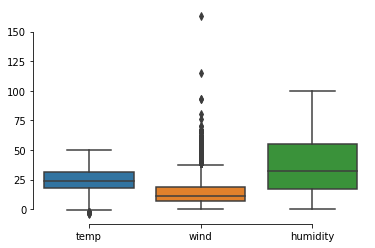

In [15]:
df_box=df[['temp','wind','humidity']]
sns.boxplot(data=df_box)
sns.despine(offset=0, trim=True)

C:\Users\WELCOME\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


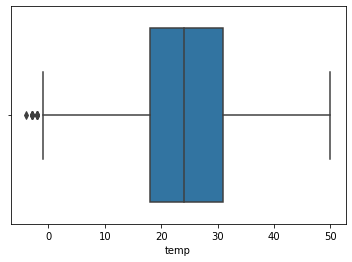

In [16]:
sns.boxplot(df['temp']);

C:\Users\WELCOME\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


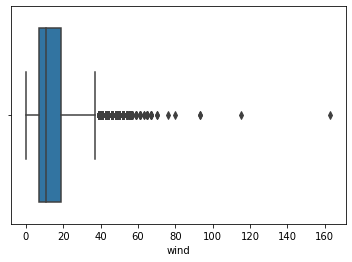

In [17]:
sns.boxplot(df['wind']);

In [18]:
df.wind[df.wind >70]=None;

<ipython-input-18-55a074a8f235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.wind[df.wind >70]=None;


In [19]:
df.isna().sum()

region        0
date          0
time          0
year          0
month         0
day           0
hour          0
temp          0
wind        115
humidity     17
sunny         0
dtype: int64

In [20]:
df[df.isna().any(axis=1)]

,region,date,time,year,month,day,hour,temp,wind,humidity,sunny
2447,Qassim,16-Apr-17,3:00,2017,4,16,3,24,NaN,69.0,0
3385,Qassim,26-May-17,10:00,2017,5,26,10,37,7.0,NaN,100
4028,Qassim,22-Jun-17,9:00,2017,6,22,9,36,NaN,22.0,100
4468,Qassim,10-Jul-17,17:00,2017,7,10,17,44,NaN,17.0,100
5270,Qassim,13-Aug-17,4:00,2017,8,13,4,34,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
229454,Aljawf,2-Feb-17,23:36,2017,2,2,23,5,6.0,NaN,0
229913,Aljawf,22-Feb-17,6:23,2017,2,22,6,7,11.0,NaN,0
232160,Aljawf,25-May-17,12:00,2017,5,25,12,27,NaN,18.0,0
236467,Aljawf,20-Nov-17,21:06,2017,11,20,21,24,NaN,24.0,0


In [21]:
df=df.interpolate(method='linear')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   region    249023 non-null  object 
 1   date      249023 non-null  object 
 2   time      249023 non-null  object 
 3   year      249023 non-null  int64  
 4   month     249023 non-null  int64  
 5   day       249023 non-null  int64  
 6   hour      249023 non-null  int64  
 7   temp      249023 non-null  int64  
 8   wind      249023 non-null  float64
 9   humidity  249023 non-null  float64
 10  sunny     249023 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 20.9+ MB


In [22]:
df.isna().sum()

region      0
date        0
time        0
year        0
month       0
day         0
hour        0
temp        0
wind        0
humidity    0
sunny       0
dtype: int64

C:\Users\WELCOME\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


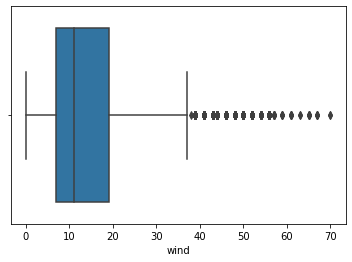

In [23]:
sns.boxplot(df['wind']);

In [24]:
df1 = df.loc[(df.index) , ['region','sunny','wind','temp','humidity','day']]
avrg = df1.groupby(by = ['region']).mean()
#avrg.reset_index(level=0, inplace=True)
avrg

,sunny,wind,temp,humidity,day
region,,,,,
Aljawf,37.278892,13.853331,23.101268,30.499926,15.681456
Assir,26.972123,12.350719,20.257414,47.590154,15.708185
Baha,27.852097,14.590385,23.468110,38.722982,15.685355
ER,36.595515,14.850392,27.215077,45.093542,15.714888
Hail,34.491327,12.877988,25.927837,41.532826,15.680831
Jazan,26.733572,12.375738,20.711735,45.803066,15.681426
Madina,37.700977,11.793363,28.708740,19.971600,15.684798
Mecca,32.188672,13.909414,29.023239,54.158772,15.681419
NB,40.004942,13.601680,24.978799,26.263850,15.694490


In [25]:
df2 = df.loc[(df['year'] == 2017) , ['region','sunny','temp','humidity','wind','day','month','year']]
avrg_M17 = df2.groupby(by = ['region','month']).mean()
avrg_M17.reset_index(level=0,inplace=True)
avrg_M17

,region,sunny,temp,humidity,wind,day,year
month,,,,,,,
1,Aljawf,29.019074,10.538147,42.277929,12.633515,16.038147,2017.0
2,Aljawf,37.462687,10.435821,27.670896,14.570149,14.482090,2017.0
3,Aljawf,34.214003,17.721268,37.919419,18.578600,15.826948,2017.0
4,Aljawf,32.653061,23.209524,25.767347,16.746939,15.538776,2017.0
5,Aljawf,49.597855,29.463807,15.453083,15.614611,15.957105,2017.0
...,...,...,...,...,...,...,...
8,Tabuk,37.313433,34.401628,19.185889,12.446404,15.925373,2017.0
9,Tabuk,34.685315,30.885315,21.503497,10.965734,15.525874,2017.0
10,Tabuk,46.081081,23.885135,28.681081,9.934459,15.989189,2017.0


In [26]:
df3 = df.loc[(df['year'] == 2018) , ['region','sunny','temp','humidity','wind','day','month','year']]
avrg_M18 = df3.groupby(by = ['region','month']).mean()
avrg_M18.reset_index(level=0,inplace=True)
avrg_M18

,region,sunny,temp,humidity,wind,day,year
month,,,,,,,
1,Aljawf,25.845737,10.880920,48.304465,14.472260,15.788904,2018.0
2,Aljawf,24.850299,15.976048,38.474551,14.230539,14.640719,2018.0
3,Aljawf,37.983425,22.069061,23.527624,14.812155,16.110497,2018.0
4,Aljawf,33.333333,23.266949,26.853107,16.573446,15.555085,2018.0
5,Aljawf,34.718499,28.683646,21.242627,17.757373,15.765416,2018.0
...,...,...,...,...,...,...,...
8,Tabuk,51.282051,32.175439,22.993252,12.900135,16.006748,2018.0
9,Tabuk,27.538248,32.070932,20.866481,11.532684,15.546592,2018.0
10,Tabuk,29.704301,25.326613,31.458333,12.767473,16.045699,2018.0


In [27]:
df4 = df.loc[(df['year'] == 2019) , ['region','sunny','temp','humidity','wind','day','month','year']]
avrg_M19 = df4.groupby(by = ['region','month']).mean()
avrg_M19.reset_index(level=0,inplace=True)
avrg_M19

,region,sunny,temp,humidity,wind,day,year
month,,,,,,,
1,Aljawf,23.505976,11.759628,50.795485,13.475432,16.131474,2019.0
2,Aljawf,26.002972,12.939079,55.610698,9.644874,14.405646,2019.0
3,Aljawf,33.055556,15.548611,38.075000,15.838889,16.006944,2019.0
4,Aljawf,37.765205,20.625177,29.540311,12.766620,15.554455,2019.0
1,Assir,42.019100,17.125512,51.613915,10.922237,15.948158,2019.0
2,Assir,25.722983,17.484018,58.039574,15.611872,14.407915,2019.0
3,Assir,28.412256,18.732591,53.750696,19.896936,16.089136,2019.0
4,Assir,20.084866,21.107496,52.875530,15.360679,15.524752,2019.0
1,Baha,29.614325,18.687328,50.820937,12.545455,16.085399,2019.0


Text(0.5, 1.0, '2019')

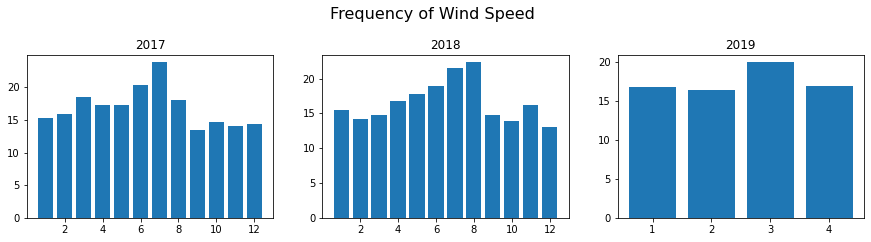

In [28]:
plt.figure(figsize=[15,3])


plt.suptitle('Frequency of Wind Speed',fontsize = 16,y=1.1)


plt.subplot(1,3,1)
plt.bar(avrg_M17.index,avrg_M17.wind)
plt.title('2017')


plt.subplot(1,3,2)
plt.bar(avrg_M18.index,avrg_M18.wind)
plt.title('2018')

plt.subplot(1,3,3)
plt.bar(avrg_M19.index,avrg_M19.wind)
plt.title('2019')


In [29]:
avrg['sunny'].nlargest(5)

region
NB        40.004942
Madina    37.700977
Aljawf    37.278892
ER        36.595515
Tabuk     34.649209
Name: sunny, dtype: float64

In [30]:
avrg['wind'].nlargest(5)

region
ER        14.850392
Baha      14.590385
Mecca     13.909414
Aljawf    13.853331
NB        13.601680
Name: wind, dtype: float64

<AxesSubplot:>

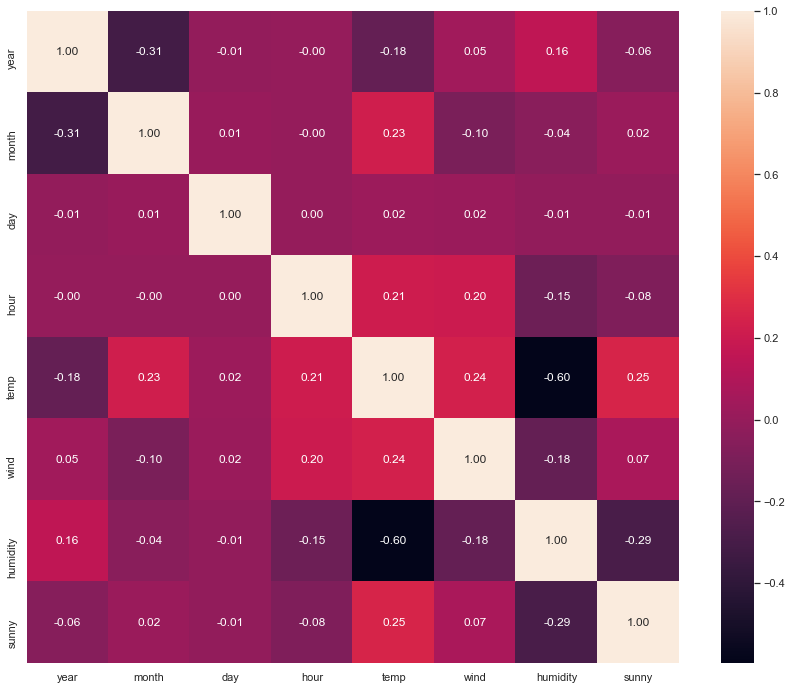

In [31]:
sns.set(rc = {'figure.figsize':(15,12)})
correlation = df.corr()
#plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12})

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

<Figure size 864x864 with 0 Axes>

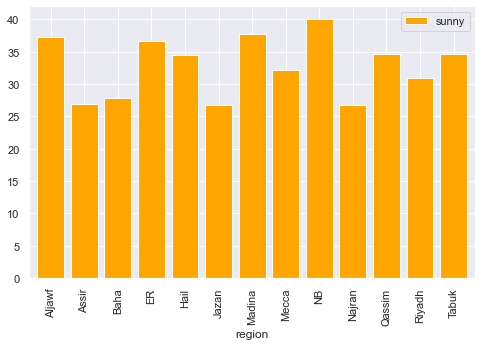

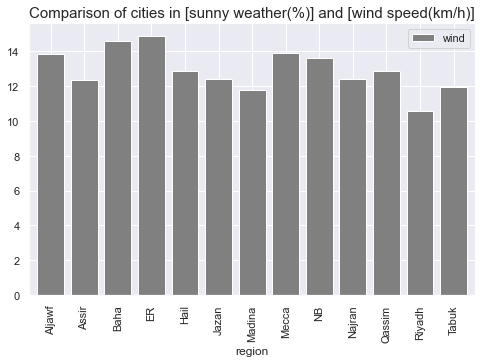

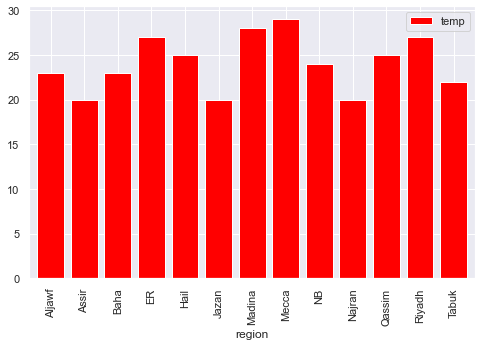

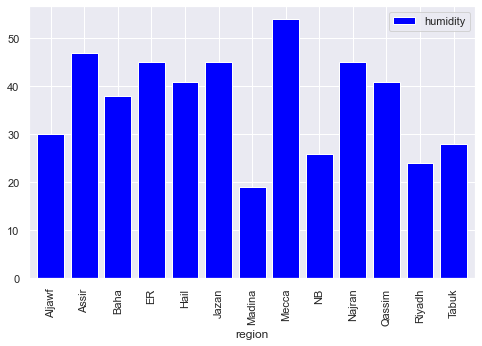

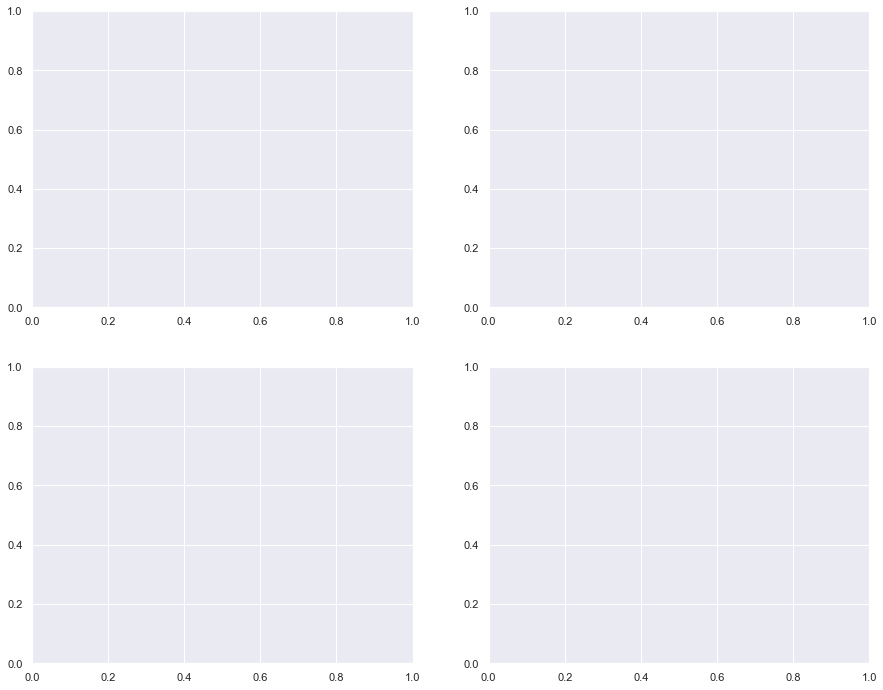

In [32]:
plt.figure(figsize=(12,12))
avrg_SW1=avrg.loc[(avrg.index),['sunny']]
avrg_SW2=avrg.loc[(avrg.index),['wind']]
# avrg_SW

fig1 = avrg_SW1.plot.bar(width=0.8,figsize=(8,5), color=['orange'])
fig2 = avrg_SW2.plot.bar(width=0.8,figsize=(8,5), color=['gray'])

# fig.canvas.set_window_title('Window Title')
#ax = fig.add_subplot(fig) 
#ax2 = fig.add_subplot(fig1) 
# ax3 = fig.add_subplot(313)

plt.title('Comparison of cities in [sunny weather(%)] and [wind speed(km/h)]',fontsize = 15)
plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
#['orange','gray','red','blue','black','pink','brown','green','yellow']
avrg_eff1=avrg.loc[(avrg.index),['temp']].astype(int)
avrg_eff2=avrg.loc[(avrg.index),['humidity']].astype(int)

# avrg_eff
fig3 = avrg_eff1.plot.bar(width=0.8,figsize=(8,5), color=['red'])
fig4 = avrg_eff2.plot.bar(width=0.8,figsize=(8,5), color=['blue'])

# x = 
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(fig1)
ax[0, 1].plot(fig2)
ax[1, 0].plot(fig3)
ax[1, 1].plot(fig4)

ax[0, 0].set_title("Sine function")
ax[0, 1].set_title("Cosine function")
ax[1, 0].set_title("Sigmoid function")
ax[1, 1].set_title("Exponential function")

fig.tight_layout()
plt.show()


plt.title('Comparison of cities in [temp(°C)]',fontsize = 16)
plt.title('Comparison of cities in humidity %',fontsize = 16)

plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation=90)

In [ ]:
# plt.figure(figsize=(12,12))
avrg_SW1=avrg.loc[(avrg.index),['sunny']]
avrg_SW2=avrg.loc[(avrg.index),['wind']]
# avrg_SW

fig1 = avrg_SW1.plot.bar(width=0.8,figsize=(8,5), color=['orange'])
fig2 = avrg_SW2.plot.bar(width=0.8,figsize=(8,5), color=['gray'])

# fig.canvas.set_window_title('Window Title')
#ax = fig.add_subplot(fig) 
#ax2 = fig.add_subplot(fig1) 
# ax3 = fig.add_subplot(313)

#plt.title('Comparison of cities in [sunny weather(%)] and [wind speed(km/h)]',fontsize = 15)
#plt.legend(bbox_to_anchor = (1,1))
#plt.xticks(rotation=90)
#['orange','gray','red','blue','black','pink','brown','green','yellow']
avrg_eff1=avrg.loc[(avrg.index),['temp']].astype(int)
avrg_eff2=avrg.loc[(avrg.index),['humidity']].astype(int)

# avrg_eff
fig3 = avrg_eff1.plot.bar(width=0.8,figsize=(8,5), color=['red'])
fig4 = avrg_eff2.plot.bar(width=0.8,figsize=(8,5), color=['blue'])

# x = 
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(fig1)
ax[0, 1].plot(fig2)
ax[1, 0].plot(fig3)
ax[1, 1].plot(fig4)

ax[0, 0].set_title("Sine function")
ax[0, 1].set_title("Cosine function")
ax[1, 0].set_title("Sigmoid function")
ax[1, 1].set_title("Exponential function")

fig.tight_layout()
plt.show()


#plt.title('Comparison of cities in [temp(°C)]',fontsize = 16)
#plt.title('Comparison of cities in humidity %',fontsize = 16)

#plt.legend(bbox_to_anchor = (1,1))
#plt.xticks(rotation=90)

In [ ]:
#plt.figure(figsize=(12,18))
df= df.sort_values("wind", ascending=True)
fig, ax = plt.subplots(2, 2)
# sun = df.groupby("region").sunny()
# df[['region', 'sunny']].groupby(['region']).sort_values(by='sunny')
# sunny_sorted = np.sort(df.sunny.unique())
sns.barplot(data= df, y = df.region, x = df.sunny , ax =ax[0,0], color="orange")
sns.barplot(data= df, y = df.region, x = df.wind , ax =ax[0,1], color="gray")
sns.barplot(data= df, y = df.region, x = df.temp , ax =ax[1,0], color="blue")
sns.barplot(data= df, y = df.region, x = df.humidity , ax =ax[1,1], color="red")


In [ ]:

fig, ax = plt.subplots(2, 2)
sns.scatterplot(data= df, x = (df.month), y = df.hour , ax =ax[0,0], color="orange")
sns.scatterplot(data= df, y = df.region, x = df.wind , ax =ax[0,1], color="gray")
sns.scatterplot(data= df, y = df.region, x = df.temp , ax =ax[1,0], color="blue")
sns.scatterplot(data= df, y = df.region, x = df.humidity , ax =ax[1,1], color="red")

In [33]:
avrg_SW

NameError: name 'avrg_SW' is not defined

In [34]:
avrg_SW=avrg.loc[(avrg.index),['sunny','wind']]
avrg_SW

,sunny,wind
region,,
Aljawf,37.278892,13.853331
Assir,26.972123,12.350719
Baha,27.852097,14.590385
ER,36.595515,14.850392
Hail,34.491327,12.877988
Jazan,26.733572,12.375738
Madina,37.700977,11.793363
Mecca,32.188672,13.909414
NB,40.004942,13.601680


In [68]:
df1 = df.loc[(df.region) ==('Aljawf'  'Tabuk')]
df1



TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [64]:
df3 = df1.loc[df1['sunny'] == 100]
df3

,region,date,time,year,month,day,hour,temp,wind,humidity,sunny
115081,Tabuk,1-Jan-17,8:00,2017,1,1,8,8,6.0,46.0,100
115082,Tabuk,1-Jan-17,9:00,2017,1,1,9,9,26.0,43.0,100
115083,Tabuk,1-Jan-17,10:00,2017,1,1,10,10,37.0,37.0,100
115084,Tabuk,1-Jan-17,11:00,2017,1,1,11,12,30.0,33.0,100
115085,Tabuk,1-Jan-17,12:00,2017,1,1,12,13,33.0,31.0,100
...,...,...,...,...,...,...,...,...,...,...,...
135304,Tabuk,30-Apr-19,15:00,2019,4,30,15,34,6.0,7.0,100
135305,Tabuk,30-Apr-19,16:00,2019,4,30,16,35,13.0,6.0,100
135306,Tabuk,30-Apr-19,17:00,2019,4,30,17,35,24.0,5.0,100
135307,Tabuk,30-Apr-19,18:00,2019,4,30,18,33,22.0,8.0,100


In [37]:
"""
df.rename(columns={
'temp': 'temp(°C)', "wind":'wind(km/h)','humidity':'humidity(%)' , 'sunny' :'sunny(%)'
}, inplace=True)
"""

'\ndf.rename(columns={\n\'temp\': \'temp(°C)\', "wind":\'wind(km/h)\',\'humidity\':\'humidity(%)\' , \'sunny\' :\'sunny(%)\'\n}, inplace=True)\n'

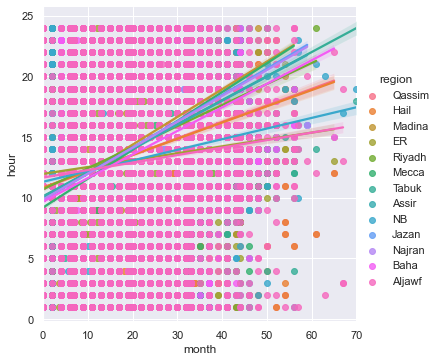

In [38]:
sns.set_theme()
g = sns.lmplot(data =df, x= 'wind', y= 'hour' , hue= ('region'), height=5)
g.set_axis_labels('month', 'hour')

In [39]:
#sns.set_theme()
#g = sns.lmplot(data =df, x= 'month', y= 'hour' , hue= ('region'), height=5)
#g.set_axis_labels('month', 'hour')

#sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
'''
sns.lmplot(x="hour", y="day", col="region", hue="sunny", data=df1,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
'''


#sns.scatterplot(data= df, x = (df.month), y = df.hour , ax =ax[0,0], color="orange")
#sns.scatterplot(data= df, y = df.region, x = df.wind , ax =ax[0,1], color="gray")

sns.boxplot(x="month", y="hour",
            hue="sunny", palette=["m", "g"], 
            data=df1)
sns.despine(offset=10, trim=True)



ValueError: min() arg is an empty sequence

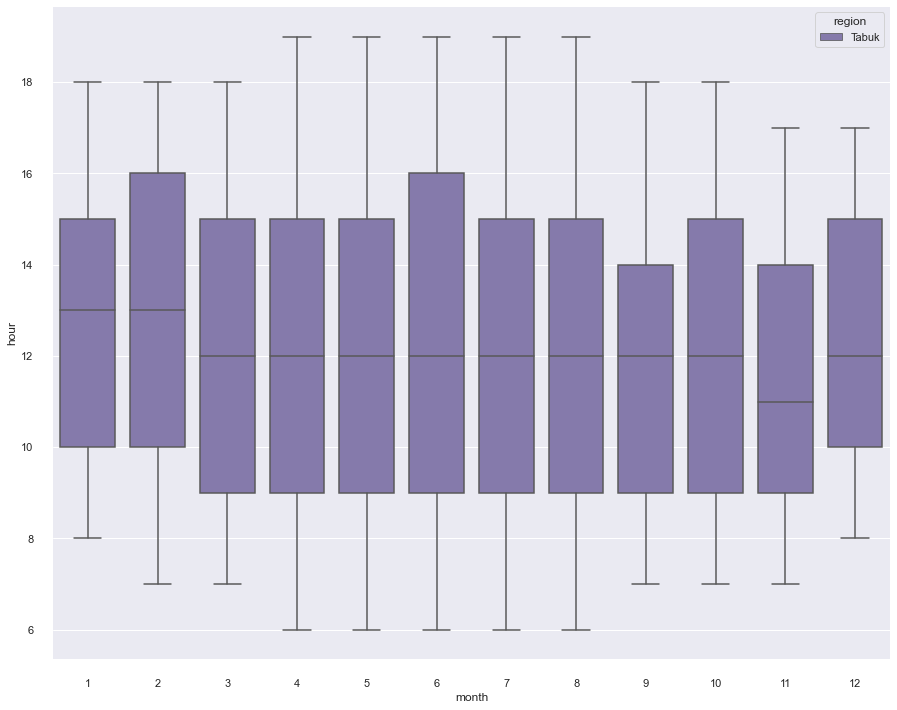

In [65]:

sns.boxplot(x="month", y="hour",
            hue="region", palette=["m", "g"], 
            data=df3)
sns.despine(offset=10, trim=True)